In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()
print(X_train.shape)

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)


In [3]:
accuracy = []

for k in range(1, 21):
  print("k: ", k)
  acc = []
  for f in range(5):
    # divide data into folds
    validationX, validationY = X_train[f*10000:(f+1)*10000], Y_train[f*10000:(f+1)*10000]
    trainX = np.concatenate((X_train[:f*10000], X_train[(f+1)*10000:]), axis = 0)
    trainY = np.concatenate((Y_train[:f*10000], Y_train[(f+1)*10000:]), axis = 0)
    cm = ce = 0         # c for correct, m for manhattan, e for euclidean

    for i in range(len(validationX)):
      man_distance = []
      euc_distance = []

      for j in range(len(trainX)):
        
        # manhattan - calculating distance between two images
        l1 = np.sum(np.absolute(np.subtract(validationX[i], trainX[j])))

        # euclidean - calculation distance between two images
        l2 = np.sqrt(np.sum((validationX[i] - trainX[j])**2))

        man_distance.append([l1, trainY[j][0]])
        euc_distance.append([l2, trainY[j][0]])
        
        if j == 400:
            break

      man_distance = np.array(man_distance)
      man_distance = man_distance[man_distance[:, 0].argsort()]
      euc_distance = np.array(euc_distance)
      euc_distance = euc_distance[euc_distance[:, 0].argsort()]
      
      # for manhattan distance
      values = man_distance[:k, 1]

      # print(values)
      most_frequent_value = np.argmax(np.bincount(values.astype('int32')))

      # print(most_frequent_value)
      if most_frequent_value == validationY[i]:
        cm += 1
        
      # for euclidean distance
      values = euc_distance[:k, 1]
      most_frequent_value = np.argmax(np.bincount(values.astype('int32')))
      if most_frequent_value == validationY[i]:
        ce += 1

      # print(man_distance[0][0], man_distance[-1][0])
      # print(euc_distance[0], euc_distance[-1])

      if i == 100:
        break

    acc.append([cm, ce])
  accuracy.append([acc, k])

print(accuracy)

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9
k:  10
k:  11
k:  12
k:  13
k:  14
k:  15
k:  16
k:  17
k:  18
k:  19
k:  20
[[[[16, 15], [24, 17], [16, 11], [21, 19], [10, 13]], 1], [[[16, 10], [18, 20], [16, 12], [16, 16], [14, 13]], 2], [[[24, 10], [23, 15], [13, 15], [16, 11], [12, 15]], 3], [[[16, 14], [26, 24], [14, 14], [12, 20], [14, 17]], 4], [[[10, 15], [23, 20], [17, 15], [15, 19], [12, 18]], 5], [[[10, 13], [22, 16], [17, 16], [16, 15], [12, 16]], 6], [[[13, 15], [23, 17], [14, 15], [19, 15], [16, 19]], 7], [[[17, 16], [22, 16], [19, 16], [15, 17], [15, 21]], 8], [[[12, 12], [25, 17], [16, 17], [16, 16], [17, 20]], 9], [[[15, 12], [24, 19], [17, 17], [20, 19], [20, 20]], 10], [[[17, 10], [23, 16], [20, 19], [17, 22], [20, 21]], 11], [[[15, 12], [21, 17], [19, 19], [21, 22], [20, 24]], 12], [[[13, 13], [19, 18], [19, 17], [16, 17], [22, 23]], 13], [[[14, 13], [17, 21], [21, 19], [14, 17], [21, 23]], 14], [[[18, 11], [18, 23], [18, 17], [18, 18], [20, 20]], 15], [[[14, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


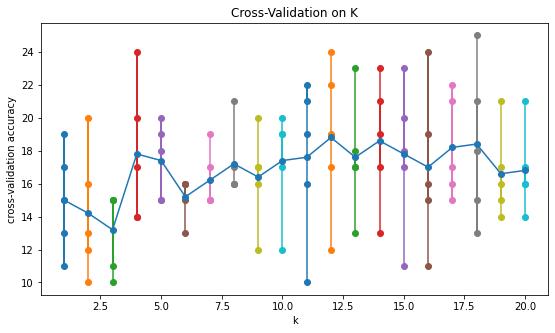

In [4]:
avg1 = []
avg2 = []
k = np.array(accuracy)[:,1]

plt.figure(figsize=(20,5))


plt.subplot(1,2,2)
plt.title('Cross-Validation on K')
for i in range(len(accuracy)):
  a = np.full((5), i+1, dtype=int)
  l2 = np.array(accuracy[i][0])[:,1]
  avg2.append(np.average(l2))
  plt.plot(a, l2, 'o-')

plt.plot(k, avg2, 'o-')
plt.xlabel('k')
plt.ylabel('cross-validation accuracy')

plt.show()